In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from collections import defaultdict
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
edges_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Mining/graph.csv')
content_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Mining/content.csv')

In [8]:
edges_df

,Source,Target
0,https://learnpython.com/introduction,https://learnpython.com/basics
1,https://learnpython.com/introduction,https://datasciencehub.com/overview
2,https://learnpython.com/basics,https://datasciencehub.com/statistics
3,https://aiworld.com/artificial-intelligence,https://aiworld.com/machine-learning
4,https://aiworld.com/machine-learning,https://datasciencehub.com/tools
5,https://datasciencehub.com/overview,https://datasciencehub.com/tools
6,https://datasciencehub.com/tools,https://datasciencehub.com/statistics
7,https://datasciencehub.com/big-data,https://datasciencehub.com/deep-learning
8,https://datasciencehub.com/big-data,https://datasciencehub.com/time-series-analysis
9,https://datasciencehub.com/deep-learning,https://aiworld.com/natural-language-processing


In [9]:
content_df

,URL,Title,Content
0,https://learnpython.com/introduction,Introduction to Python,Python is a versatile programming language use...
1,https://learnpython.com/basics,Python Basics,"The basics of Python include variables, loops,..."
2,https://aiworld.com/artificial-intelligence,What is Artificial Intelligence?,Artificial Intelligence (AI) refers to the sim...
3,https://aiworld.com/machine-learning,Understanding Machine Learning,Machine Learning (ML) is a subset of AI that e...
4,https://datasciencehub.com/overview,What is Data Science?,"Data Science combines statistics, programming,..."
5,https://datasciencehub.com/tools,Top Data Science Tools,Popular tools in data science include Jupyter ...
6,https://webdevworld.com/html-css,HTML and CSS Basics,HTML (HyperText Markup Language) is the standa...
7,https://webdevworld.com/javascript,Introduction to JavaScript,JavaScript is a programming language used to a...
8,https://blockchaininsights.com/technology,Understanding Blockchain Technology,Blockchain is a decentralized ledger technolog...
9,https://blockchaininsights.com/cryptocurrencies,Cryptocurrencies Explained,Cryptocurrencies are digital currencies built ...


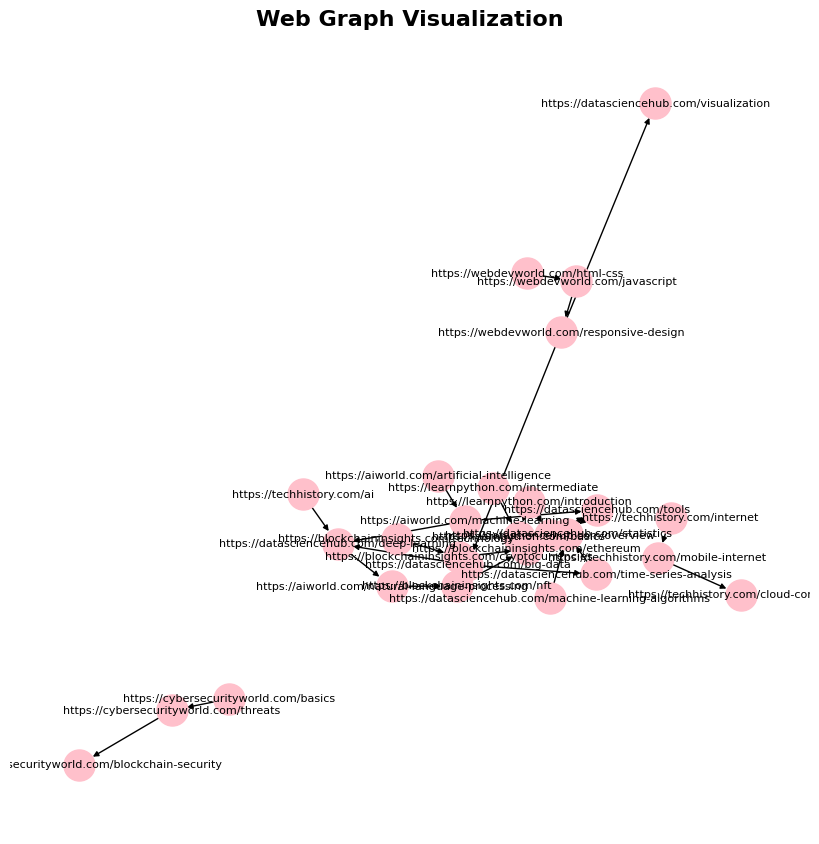

In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Assuming 'edges_df' contains your edge data with columns 'Source' and 'Target'
# Create the web graph from your edges DataFrame
web_graph = nx.from_pandas_edgelist(edges_df, source='Source', target='Target', create_using=nx.DiGraph()) # Define web_graph here

# Generate a layout for the graph
pos = nx.spring_layout(web_graph, seed=60)  # Spring layout for better spacing

plt.figure(figsize=(8,8))  # Adjust figure size as needed
nx.draw(
    web_graph,
    pos,
    with_labels=True,
    node_size=500,  # Adjust node size as needed
    node_color="pink",  # Adjust node color as needed
    font_size=8,  # Adjust font size as needed
    font_color="black",
    edge_color="black",  # Adjust edge color as needed
    width=1,
    arrowsize=8,  # Adjust arrow size as needed
    arrowstyle='-|>',
    style="solid"
)
plt.title("Web Graph Visualization", fontsize=16, fontweight='bold')
plt.show()

In [11]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

def preprocess_content(content):
    stop_words = set(stopwords.words('english'))  # List of stop words
    tokens = word_tokenize(content.lower())  # Tokenize and convert to lowercase
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens
content_df['Processed_Content'] = content_df['Content'].apply(preprocess_content)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [12]:
def inverted_index(web_content):
    inverted_index = {}
    for website, content in web_content.items():
        words = content.lower().split()
        for word in words:
            if word not in inverted_index:
                inverted_index[word] = []
            inverted_index[word].append(website)
    return inverted_index

In [13]:
# Assuming 'Title' column contains website titles and 'Content' column contains website content
web_content = dict(zip(content_df['Title'], content_df['Content']))

# Now call the function with the created web_content dictionary
index = inverted_index(web_content)
print("\nInverted Index:")
for word, websites in index.items():
    print(f"{word}: {websites}")


Inverted Index:
python: ['Introduction to Python', 'Introduction to Python', 'Python Basics', 'Python Basics', 'Top Data Science Tools']
is: ['Introduction to Python', 'Introduction to Python', 'Python Basics', 'Understanding Machine Learning', 'What is Data Science?', 'HTML and CSS Basics', 'HTML and CSS Basics', 'Introduction to JavaScript', 'Understanding Blockchain Technology']
a: ['Introduction to Python', 'Understanding Machine Learning', 'Introduction to JavaScript', 'Understanding Blockchain Technology', 'History of the Internet', 'History of the Internet']
versatile: ['Introduction to Python']
programming: ['Introduction to Python', 'Introduction to JavaScript']
language: ['Introduction to Python', 'What is Artificial Intelligence?', 'Introduction to JavaScript']
used: ['Introduction to Python', 'What is Data Science?', 'Top Data Science Tools', 'HTML and CSS Basics', 'Introduction to JavaScript']
in: ['Introduction to Python', 'What is Artificial Intelligence?', 'What is Art

In [14]:
hubs, authorities = nx.hits(web_graph, max_iter=100, tol=1e-6)
print("\nHITS - Hub Scores:", hubs)
print("\nHITS - Authority Scores:", authorities)


HITS - Hub Scores: {'https://learnpython.com/introduction': 0.14854314511050562, 'https://learnpython.com/basics': 0.25728427444747215, 'https://datasciencehub.com/overview': 8.852464098249104e-18, 'https://datasciencehub.com/statistics': 0.10874112933696657, 'https://aiworld.com/artificial-intelligence': 2.6144027332210205e-18, 'https://aiworld.com/machine-learning': -1.3920572004974438e-17, 'https://datasciencehub.com/tools': 0.14854314511050562, 'https://datasciencehub.com/big-data': -3.6301465975929353e-17, 'https://datasciencehub.com/deep-learning': -2.5278858402100845e-19, 'https://datasciencehub.com/time-series-analysis': 0.14854314511050562, 'https://aiworld.com/natural-language-processing': 4.750941587524199e-18, 'https://blockchaininsights.com/nft': -1.3826088732026359e-17, 'https://blockchaininsights.com/technology': 2.6564872820551685e-18, 'https://blockchaininsights.com/cryptocurrencies': -1.3826088732026359e-17, 'https://blockchaininsights.com/ethereum': 8.85246409824910

In [15]:
pagerank_scores = nx.pagerank(web_graph, alpha=0.85, max_iter=100, tol=1e-6)
print("\nPageRank Scores:", pagerank_scores)


PageRank Scores: {'https://learnpython.com/introduction': 0.006865794739342251, 'https://learnpython.com/basics': 0.015619683032003624, 'https://datasciencehub.com/overview': 0.2013730885702701, 'https://datasciencehub.com/statistics': 0.21757646928178512, 'https://aiworld.com/artificial-intelligence': 0.006865794739342251, 'https://aiworld.com/machine-learning': 0.012701720267783167, 'https://datasciencehub.com/tools': 0.2202561637888331, 'https://datasciencehub.com/big-data': 0.014372253950299382, 'https://datasciencehub.com/deep-learning': 0.02420815931046826, 'https://datasciencehub.com/time-series-analysis': 0.012974002668219492, 'https://aiworld.com/natural-language-processing': 0.027442730153240287, 'https://blockchaininsights.com/nft': 0.030192115369596526, 'https://blockchaininsights.com/technology': 0.006865794739342251, 'https://blockchaininsights.com/cryptocurrencies': 0.012701720267783167, 'https://blockchaininsights.com/ethereum': 0.04332555503111504, 'https://cybersecur

In [16]:
def inverted_index(web_content):
    inverted_index = {}
    for website, content in web_content.items():
        words = content.lower().split()  # Tokenize and lowercase
        for word in words:
            if word not in inverted_index:
                inverted_index[word] = []
            inverted_index[word].append(website)
    return inverted_index

# Assuming 'Title' column contains website titles and 'Content' column contains website content
web_content = dict(zip(content_df['Title'], content_df['Content']))

# Build the inverted index
index = inverted_index(web_content)

In [17]:
def search(query, index):
    query_words = query.lower().split()  # Tokenize and lowercase the query
    results = set()  # Use a set to avoid duplicates

    for word in query_words:
        if word in index:
            results.update(index[word])  # Add websites containing the word to results

    return list(results)  # Convert results back to a list

In [18]:
query = "Learning"
search_results = search(query, index)
print("Search Results for:", query)
print(search_results)

Search Results for: Learning
['Understanding Machine Learning', 'History of Artificial Intelligence']


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to your web content
web_content_list = list(web_content.values()) # Get content values as a list
vectorizer.fit(web_content_list)

# Transform your web content and query into TF-IDF vectors
web_content_tfidf = vectorizer.transform(web_content_list)
query_tfidf = vectorizer.transform([query]) # Transform query into tfidf

# Calculate cosine similarity between query and web content
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(query_tfidf, web_content_tfidf)

# Get the indices of the most similar websites
top_indices = similarity_scores.argsort()[0][::-1]

# Retrieve the titles of the top websites
top_websites = [list(web_content.keys())[i] for i in top_indices]

print("Top websites:", top_websites)

Top websites: ['Understanding Machine Learning', 'History of Artificial Intelligence', 'What is Data Science?', 'Introduction to Python', 'History of the Internet', 'Cryptocurrencies Explained', 'Understanding Blockchain Technology', 'Introduction to JavaScript', 'HTML and CSS Basics', 'Top Data Science Tools', 'What is Artificial Intelligence?', 'Python Basics']
